In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/MachineLearning/Date_Fruit_Datasets.xlsx')
data.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
data.drop(columns=['StdDevRR','StdDevRG','StdDevRB','SkewRR','KurtosisRB','ALLdaub4RR','ALLdaub4RG','ALLdaub4RB'], inplace=True)

In [ ]:
x = data.drop('Class', axis=1) # features
y = data['Class'] # class

In [ ]:
class_labels = {
    'DOKOL': 0,     
    'SAFAVI': 1,   
    'ROTANA': 2,   
    'DEGLET': 3,     
    'SOGAY': 4,     
    'IRAQI': 5,      
    'BERHI': 6  
}

y_transformed = to_categorical(y.map(class_labels))
y_transformed[:5]

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
x_transformed = MaxAbsScaler().fit_transform(x)
x_transformed[:5]

array([[ 0.7731031 ,  0.84598523,  0.68523157,  0.84241146,  0.6373    ,
         0.87926286,  0.99729296,  0.76805924,  0.91462275,  0.00242304,
         0.95917323,  0.90383225,  0.00324992,  0.34883721,  0.81692094,
         0.99409705,  0.73565325,  0.66155979,  0.64554683, -0.0030835 ,
         0.19464476,  0.12368605,  0.11061201, -0.5424299 , -0.54756933,
        -0.45640295],
       [ 0.61922525,  0.74151712,  0.59197365,  0.77657317,  0.569     ,
         0.78690867,  1.        ,  0.61349118,  0.91041813,  0.00227085,
         1.        ,  0.93637021,  0.00341241,  0.41860465,  0.87677371,
         0.9997999 ,  0.62673458,  0.63581512,  0.64543618,  0.03648806,
         0.1336869 ,  0.10021742,  0.09855367, -0.31371248, -0.40448959,
        -0.35986234],
       [ 0.9648026 ,  0.94146399,  0.76937941,  0.93334261,  0.6494    ,
         0.9822437 ,  0.99879687,  0.95707187,  0.8943004 ,  0.00245553,
         0.96654047,  0.89928726,  0.00292493,  0.3255814 ,  0.80870586,
       

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_transformed, test_size=0.2, random_state=42,shuffle=True, stratify=y_transformed)

In [ ]:
split = np.sum(y_train, axis=0, dtype='uint8')
print('train dataset')
for i in range(7): print('class', i, ":", split[i])

print()
    
split = np.sum(y_test, axis=0, dtype='uint8')
print('test dataset')
for i in range(7): print('class', i, ":", split[i])

train dataset
class 0 : 163
class 1 : 159
class 2 : 133
class 3 : 78
class 4 : 75
class 5 : 58
class 6 : 52

test dataset
class 0 : 41
class 1 : 40
class 2 : 33
class 3 : 20
class 4 : 19
class 5 : 14
class 6 : 13


In [ ]:
INPUT_SHAPE = (len(x_train[0]),)

In [ ]:
model = Sequential()

model.add(layers.Dense(512, 'relu', input_shape=INPUT_SHAPE))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7,'softmax'))

model.compile('Adam','categorical_crossentropy', ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/15
23/23 [==============================] - 4s 26ms/step - loss: 1.8149 - accuracy: 0.3273 - val_loss: 1.5131 - val_accuracy: 0.5722
Epoch 2/15
23/23 [==============================] - 0s 11ms/step - loss: 1.3720 - accuracy: 0.5557 - val_loss: 1.0294 - val_accuracy: 0.6333
Epoch 3/15
23/23 [==============================] - 0s 11ms/step - loss: 1.0669 - accuracy: 0.6253 - val_loss: 0.7611 - val_accuracy: 0.6667
Epoch 4/15
23/23 [==============================] - 0s 11ms/step - loss: 0.8937 - accuracy: 0.6671 - val_loss: 0.7567 - val_accuracy: 0.7278
Epoch 5/15
23/23 [==============================] - 0s 13ms/step - loss: 0.8015 - accuracy: 0.7006 - val_loss: 0.6050 - val_accuracy: 0.7833
Epoch 6/15
23/23 [==============================] - 0s 11ms/step - loss: 0.7329 - accuracy: 0.7201 - val_loss: 0.6341 - val_accuracy: 0.7333
Epoch 7/15
23/23 [==============================] - 0s 11ms/step - loss: 0.6428 - accuracy: 0.7591 - val_loss: 0.4627 - val_accuracy: 0.7944
Epoch 8/15
23

In [ ]:
import itertools


def calculate_confusion_matrix(x_test,y_test,classes=class_labels.keys(),title='Confusion matrix', cmap=plt.cm.Blues):

  y_pred=model.predict(x_test) 
  y_preds=np.argmax(y_pred, axis=1)
  y_tests=np.argmax(y_test, axis=1)
  cm = confusion_matrix(y_tests, y_preds)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt

  # print classification report
  report = classification_report(y_tests, y_preds, target_names=classes) 
  print(report) 


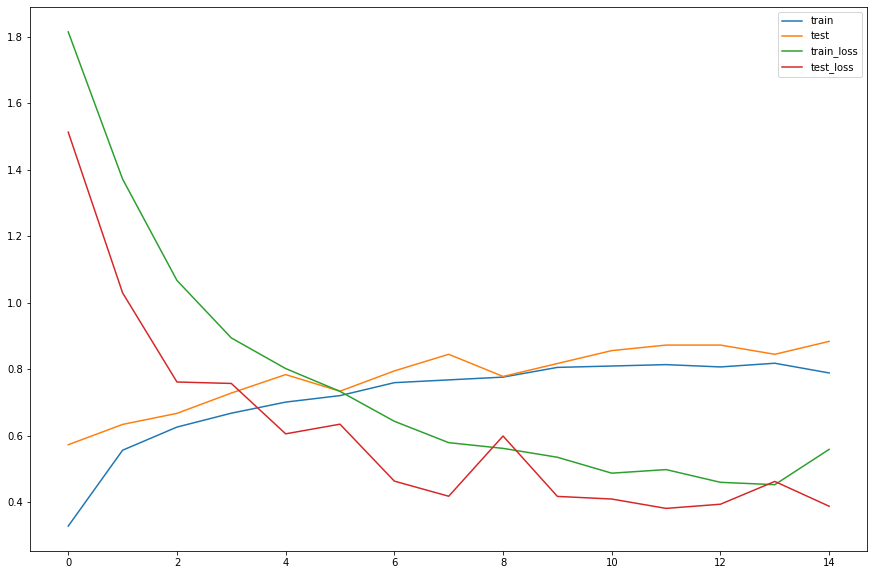

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

print('Testing metrics')
print('accuracy:', round(acc*100,3))
print('loss:', round(loss,3))

6/6 [==============================] - 0s 4ms/step
Testing metrics
accuracy: 88.333
loss: 0.387


In [ ]:
y_pred[0]

array([0.01931445, 0.00966731, 0.20733643, 0.10972092, 0.52543443,
       0.03257396, 0.09595241], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
class_labels.keys()

dict_keys(['DOKOL', 'SAFAVI', 'ROTANA', 'DEGLET', 'SOGAY', 'IRAQI', 'BERHI'])

6/6 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       DOKOL       0.95      0.93      0.94        41
      SAFAVI       0.98      1.00      0.99        40
      ROTANA       0.82      0.97      0.89        33
      DEGLET       0.86      0.60      0.71        20
       SOGAY       0.74      0.74      0.74        19
       IRAQI       0.92      0.79      0.85        14
       BERHI       0.80      0.92      0.86        13

    accuracy                           0.88       180
   macro avg       0.87      0.85      0.85       180
weighted avg       0.89      0.88      0.88       180



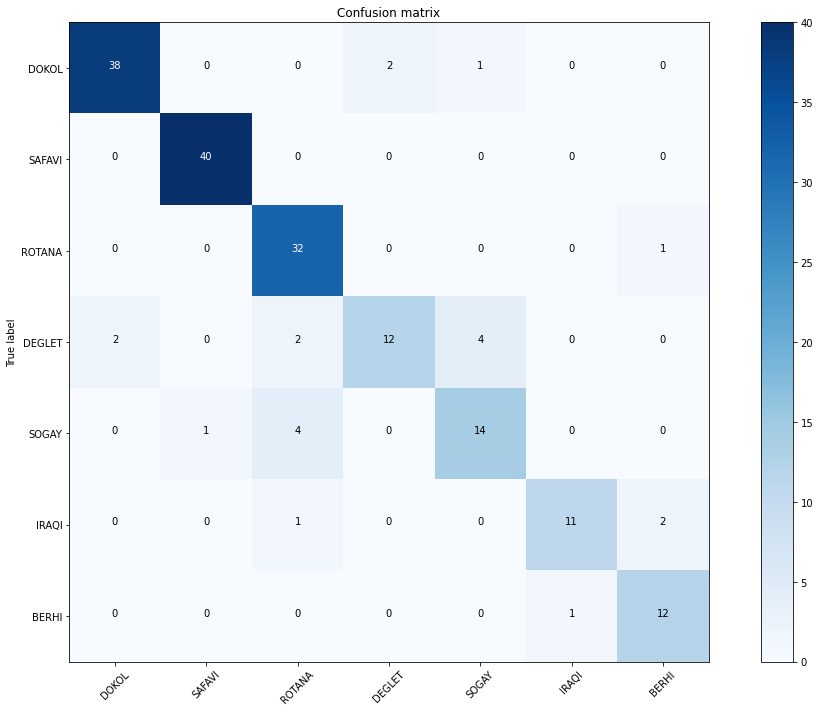

In [ ]:
calculate_confusion_matrix(x_test,y_test)

In [ ]:
model = Sequential()

model.add(layers.Dense(512, 'relu', input_shape=INPUT_SHAPE))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(7,'softmax'))

model.compile(optimizers.Adam(learning_rate=1e-4),'categorical_crossentropy', [metrics.categorical_accuracy])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               13824     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=25, restore_best_weights=True)])

Epoch 1/40
23/23 [==============================] - 2s 25ms/step - loss: 1.9708 - categorical_accuracy: 0.1490 - val_loss: 1.9228 - val_categorical_accuracy: 0.2278
Epoch 2/40
23/23 [==============================] - 0s 12ms/step - loss: 1.9253 - categorical_accuracy: 0.2075 - val_loss: 1.8945 - val_categorical_accuracy: 0.2833
Epoch 3/40
23/23 [==============================] - 0s 15ms/step - loss: 1.9015 - categorical_accuracy: 0.2604 - val_loss: 1.8635 - val_categorical_accuracy: 0.4333
Epoch 4/40
23/23 [==============================] - 0s 20ms/step - loss: 1.8658 - categorical_accuracy: 0.3064 - val_loss: 1.8281 - val_categorical_accuracy: 0.4444
Epoch 5/40
23/23 [==============================] - 0s 19ms/step - loss: 1.8378 - categorical_accuracy: 0.3259 - val_loss: 1.7852 - val_categorical_accuracy: 0.4611
Epoch 6/40
23/23 [==============================] - 0s 19ms/step - loss: 1.8240 - categorical_accuracy: 0.3259 - val_loss: 1.7253 - val_categorical_accuracy: 0.5444
Epoch 7/40

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print('Testing metrics')
print('accuracy:', round(acc*100,3))
print('loss:', round(loss,3))

6/6 [==============================] - 0s 4ms/step - loss: 0.5090 - categorical_accuracy: 0.7778
Testing metrics
accuracy: 77.778
loss: 0.509


6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       DOKOL       0.85      1.00      0.92        41
      SAFAVI       0.95      1.00      0.98        40
      ROTANA       0.62      1.00      0.77        33
      DEGLET       0.82      0.45      0.58        20
       SOGAY       0.67      0.11      0.18        19
       IRAQI       0.62      0.71      0.67        14
       BERHI       0.71      0.38      0.50        13

    accuracy                           0.78       180
   macro avg       0.75      0.66      0.66       180
weighted avg       0.78      0.78      0.74       180



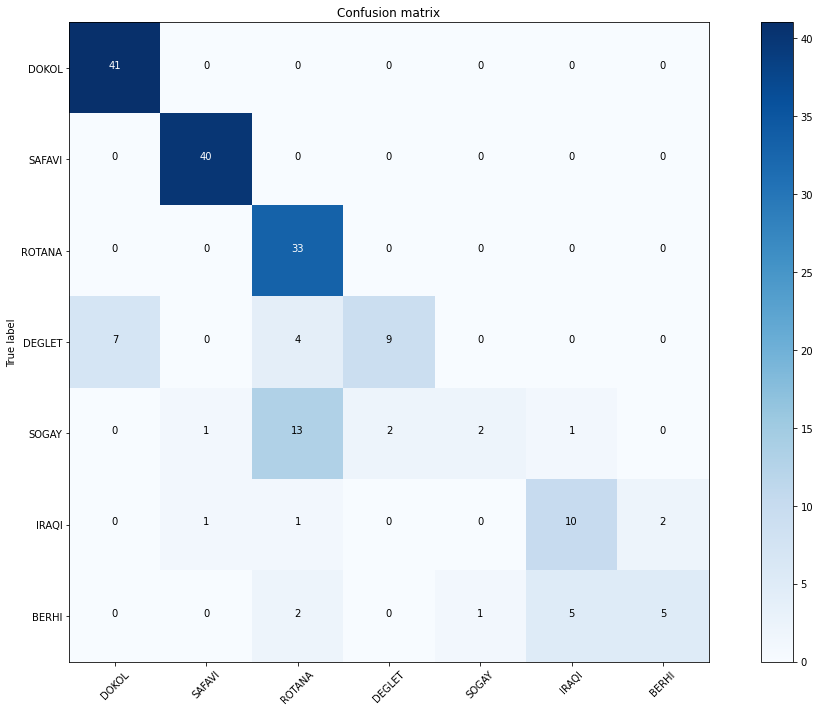

In [ ]:
calculate_confusion_matrix(x_test,y_test)

In [ ]:
model = Sequential()

model.add(layers.Dense(512, 'relu', input_shape=INPUT_SHAPE))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7,'softmax'))

model.compile('Adamax','categorical_crossentropy', ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               13824     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [ ]:
history = model.fit(x_train, y_train, epochs=140, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=25, restore_best_weights=True)])

Epoch 1/140
23/23 [==============================] - 2s 41ms/step - loss: 1.7944 - accuracy: 0.3914 - val_loss: 1.5609 - val_accuracy: 0.6167
Epoch 2/140
23/23 [==============================] - 0s 14ms/step - loss: 1.4583 - accuracy: 0.5766 - val_loss: 1.1754 - val_accuracy: 0.6278
Epoch 3/140
23/23 [==============================] - 0s 12ms/step - loss: 1.1289 - accuracy: 0.6212 - val_loss: 0.8966 - val_accuracy: 0.6333
Epoch 4/140
23/23 [==============================] - 1s 32ms/step - loss: 0.9141 - accuracy: 0.6616 - val_loss: 0.7063 - val_accuracy: 0.7167
Epoch 5/140
23/23 [==============================] - 0s 13ms/step - loss: 0.7747 - accuracy: 0.7117 - val_loss: 0.5903 - val_accuracy: 0.7722
Epoch 6/140
23/23 [==============================] - 0s 14ms/step - loss: 0.6827 - accuracy: 0.7396 - val_loss: 0.5557 - val_accuracy: 0.7833
Epoch 7/140
23/23 [==============================] - 0s 12ms/step - loss: 0.6345 - accuracy: 0.7646 - val_loss: 0.5124 - val_accuracy: 0.8000
Epoch 

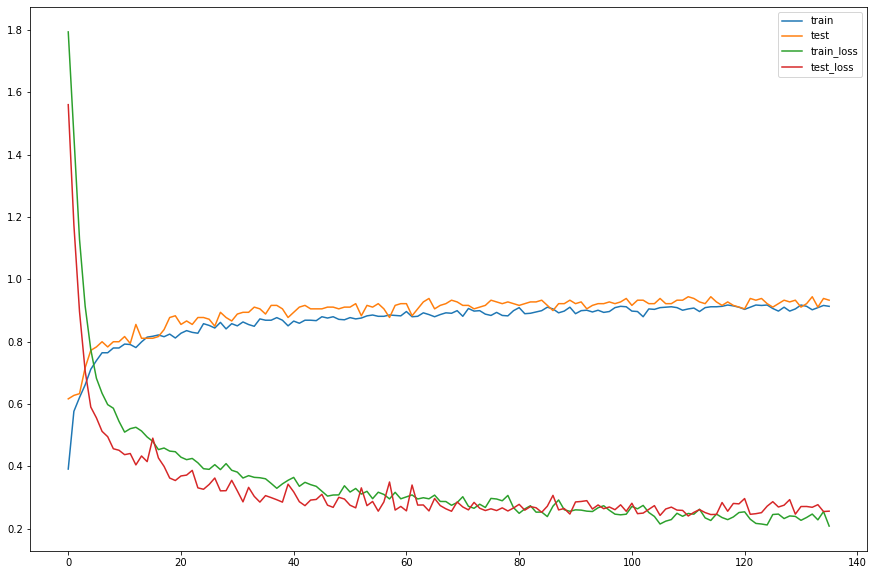

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print('Testing metrics')
print('accuracy:', round(acc*100,3))
print('loss:', round(loss,3))

6/6 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9444
Testing metrics
accuracy: 94.444
loss: 0.241


6/6 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       DOKOL       0.95      0.98      0.96        41
      SAFAVI       1.00      1.00      1.00        40
      ROTANA       0.92      1.00      0.96        33
      DEGLET       0.88      0.75      0.81        20
       SOGAY       0.89      0.89      0.89        19
       IRAQI       0.93      0.93      0.93        14
       BERHI       1.00      0.92      0.96        13

    accuracy                           0.94       180
   macro avg       0.94      0.92      0.93       180
weighted avg       0.94      0.94      0.94       180



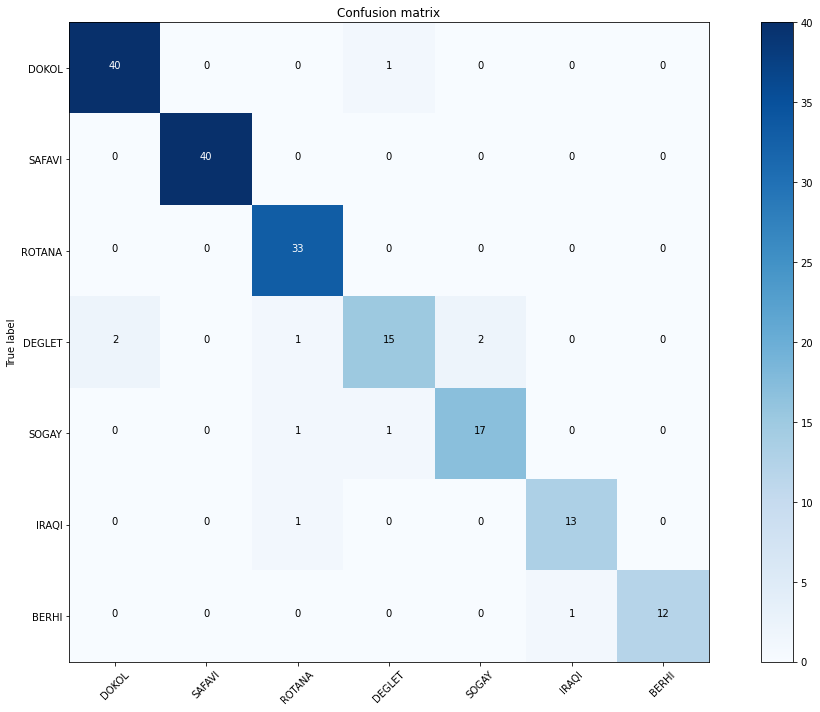

In [ ]:
calculate_confusion_matrix(x_test,y_test)